<a href="https://colab.research.google.com/github/nicolassarmiento28/proyecto-2-mobile-classification-price/blob/main/Copy_of_Copy_of_proyecto_2_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Importación y análisis exploratorio

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOKS CODING DOJO/DATOS PROYECTO 2 /train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
df.duplicated().sum()

0

no hay duplicados


In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

no hay valores nulos

In [ ]:
df.isnull().values.any()

False

nuevamente se verifica si hay valores nulos con otro método

In [ ]:
df["battery_power"].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
df["battery_power"].nunique()

1094

In [ ]:
df["blue"].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [ ]:
df["blue"].nunique()

2

In [ ]:
df["clock_speed"].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
df["clock_speed"].nunique()

26

In [ ]:
df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [ ]:
df["dual_sim"].nunique()

2

In [ ]:
df["fc"].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [ ]:
df["fc"].nunique()

20

In [ ]:
df["four_g"].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [ ]:
df["four_g"].nunique()

2

In [ ]:
df["int_memory"].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

In [ ]:
df["int_memory"].nunique()

63

In [ ]:
df["m_dep"].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

In [ ]:
df["m_dep"].nunique()

10

In [ ]:
df["mobile_wt"].value_counts()

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64

In [ ]:
df["mobile_wt"].nunique()

121

In [ ]:
df["n_cores"].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [ ]:
df["n_cores"].nunique()

8

In [ ]:
df["pc"].value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

In [ ]:
df["pc"].nunique()

21

In [ ]:
df["px_height"].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

In [ ]:
df["px_height"].nunique()

1137

In [ ]:
df["px_width"].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1125    1
1367    1
1569    1
1481    1
1632    1
Name: px_width, Length: 1109, dtype: int64

In [ ]:
df["px_width"].nunique()

1109

In [ ]:
df["ram"].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [ ]:
df["ram"].nunique()

1562

In [ ]:
df["sc_h"].value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

In [ ]:
df["sc_h"].nunique()

15

In [ ]:
df["sc_w"].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [ ]:
df["sc_w"].nunique()

19

In [ ]:
df["talk_time"].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

In [ ]:
df["three_g"].nunique()

19

In [ ]:
df["three_g"].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [ ]:
df["touch_screen"].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [ ]:
df["touch_screen"].nunique()

2

In [ ]:
df["wifi"].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [ ]:
df["wifi"].nunique()

2

In [ ]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df["price_range"].nunique()

4

no hay valores categoricos, por ende no hay inconsistencias de este tipo de datos

mapa de correlación o heatmap

In [ ]:
corr= df.corr().round(1)
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.1,0.0,-0.0,-0.0,0.2
blue,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
clock_speed,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
dual_sim,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
fc,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
four_g,0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,0.6,0.0,-0.0,0.0
int_memory,-0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
m_dep,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
mobile_wt,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
n_cores,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0


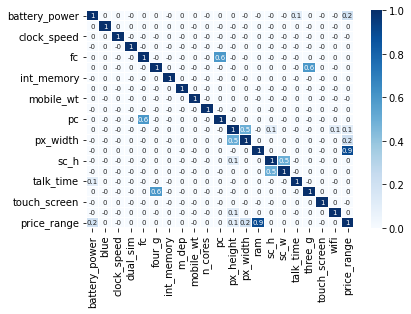

In [ ]:
sns.heatmap(corr, cmap = 'Blues', annot = True, linewidth=.10, annot_kws={"size":7})
plt.ticklabel_format()